In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 


In [84]:
df=pd.read_csv('data.csv')

In [85]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [86]:
df.columns = df.columns.str.strip()


In [87]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [88]:
df.duplicated().sum()

0

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [90]:
df['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [91]:
df['education'].value_counts()

education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [92]:
df['self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [93]:
df['self_employed'].value_counts()

self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64

In [94]:
df['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [95]:
df['loan_status'].value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [96]:
education_map={'Graduate':1,'Not Graduate':2}

In [97]:
self_employed_map={'Yes':0,'No':1}

In [98]:
df['education']=df['education'].map(education_map)
df['self_employed'] = df['self_employed'].map(self_employed_map)

In [99]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,NaN,NaN,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,NaN,NaN,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,NaN,NaN,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,NaN,NaN,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,NaN,NaN,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [100]:
#segregating numerrical and categorical columns
numerical_columns=df.columns[df.dtypes!='O']
categorical_columns=df.columns[df.dtypes=='O']
print(f'this is our numerical_columns:,{numerical_columns}')
print(f'this is our categorical_columns:,{categorical_columns}')


this is our numerical_columns:,Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')
this is our categorical_columns:,Index(['loan_status'], dtype='object')


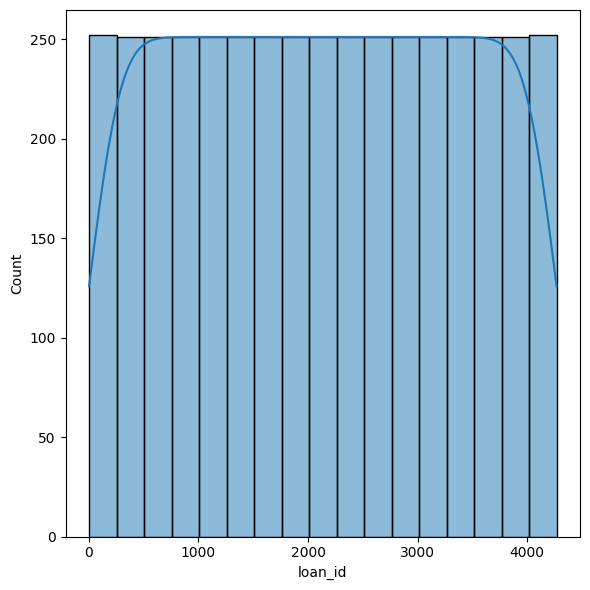

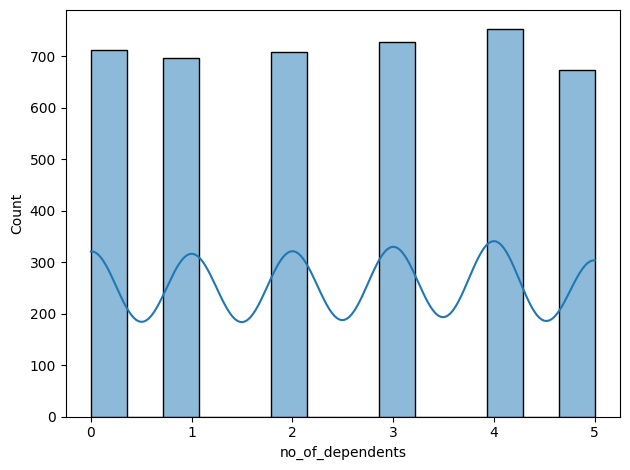

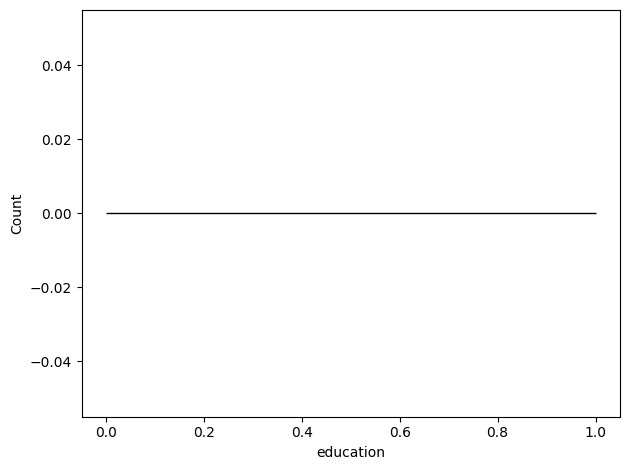

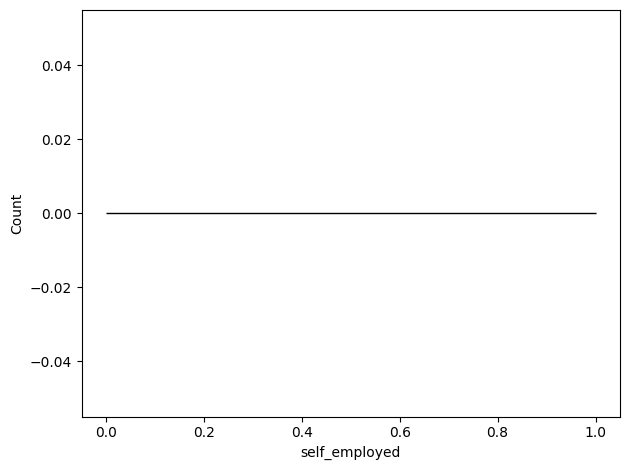

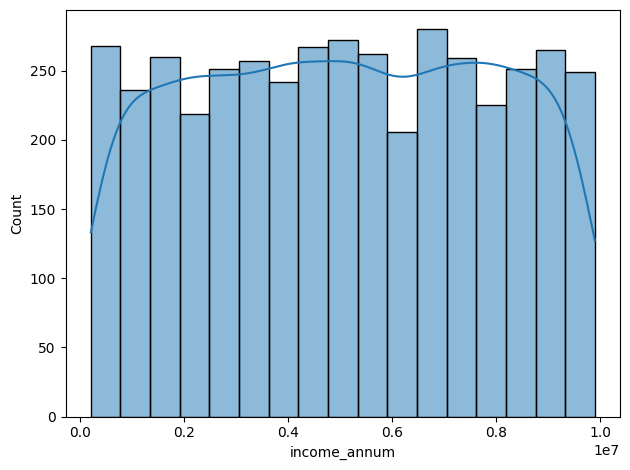

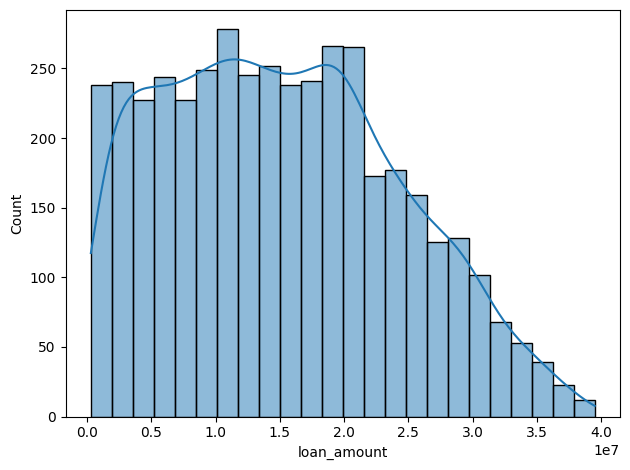

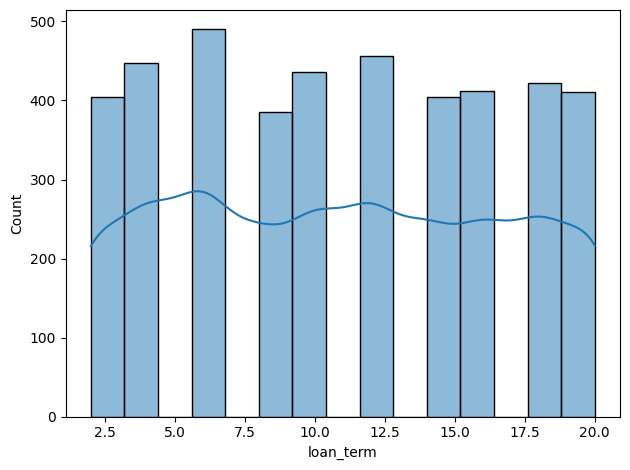

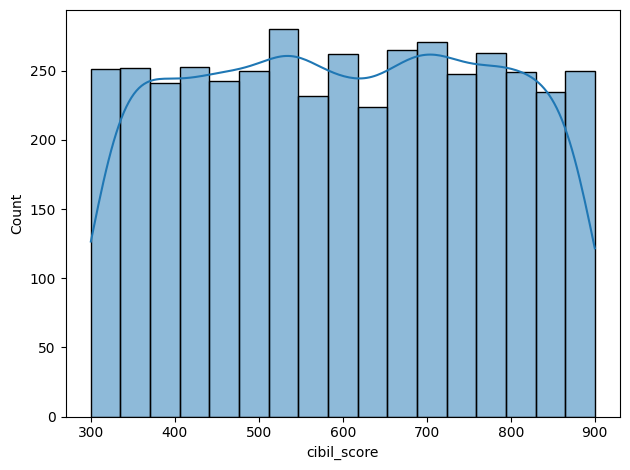

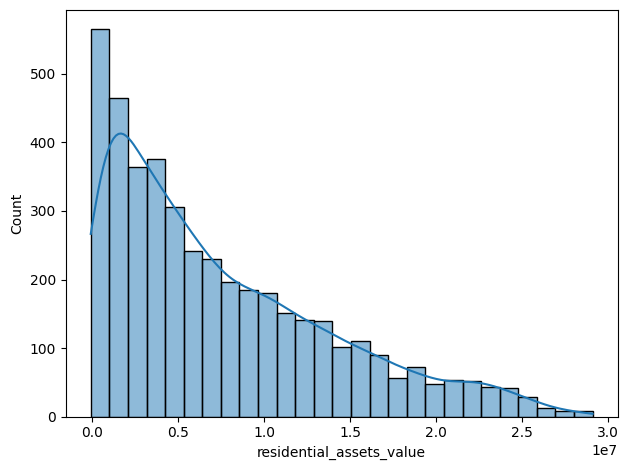

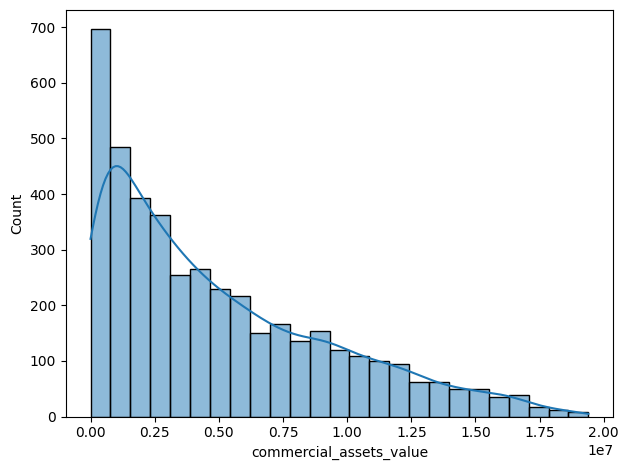

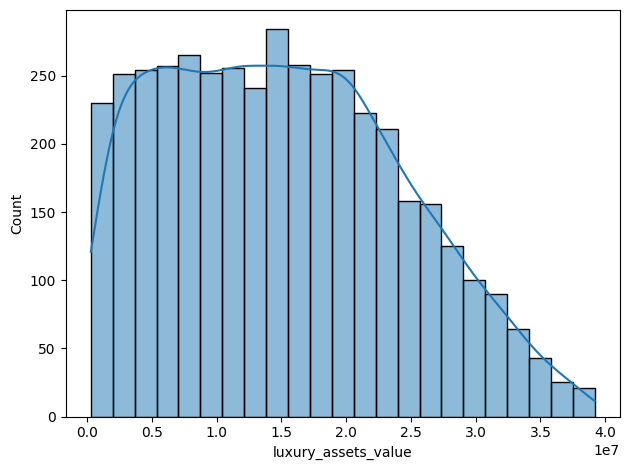

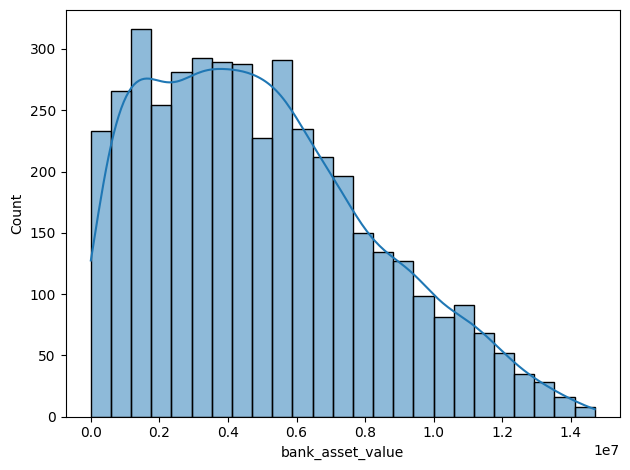

In [101]:
#numerical columns
plt.figure(figsize=[6,6])
x=0
for i in numerical_columns:
    sns.histplot(data=df,kde=True,x=i)
    print('\n')
    plt.tight_layout()
    plt.show()
    

In [102]:
import pandas as pd

from scipy import stats
# Assuming df is your DataFrame and MERICAL_COLUMNS contains your numerical columns
NUMERICAL_COLUMNS = ['bank_asset_value', 'luxury_assets_value', 'commercial_assets_value','residential_assets_value','loan_amount']  # Replace with your actual numerical column names

# Apply natural log transformation
for col in NUMERICAL_COLUMNS:
    # Adding 1 to avoid issues with log(0)
    df[col], _ = stats.boxcox(df[col] + 1)

# Now df contains the transformed columns


ValueError: Data must be positive.

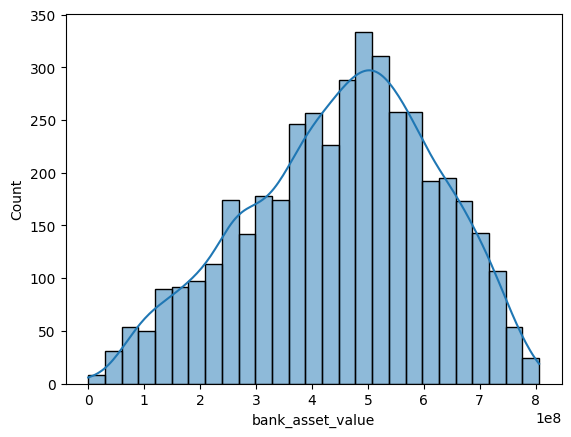

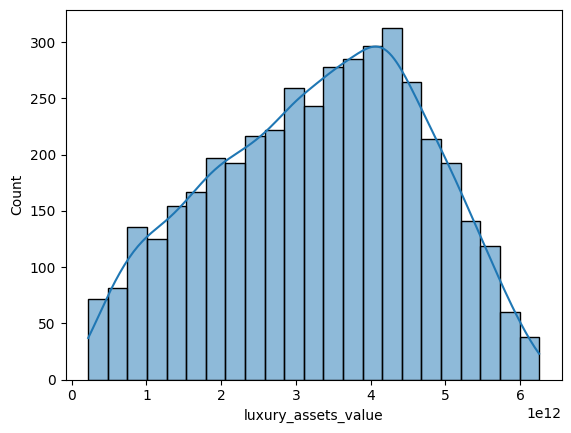

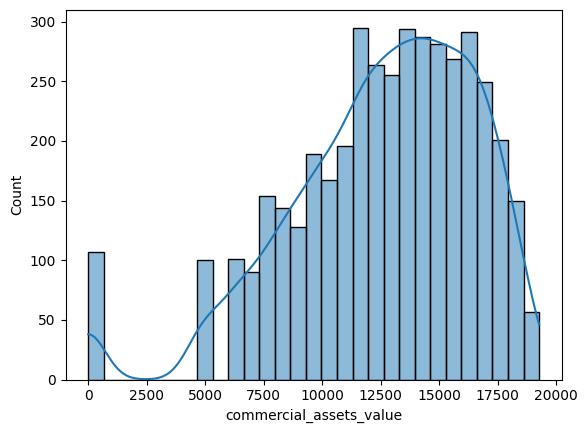

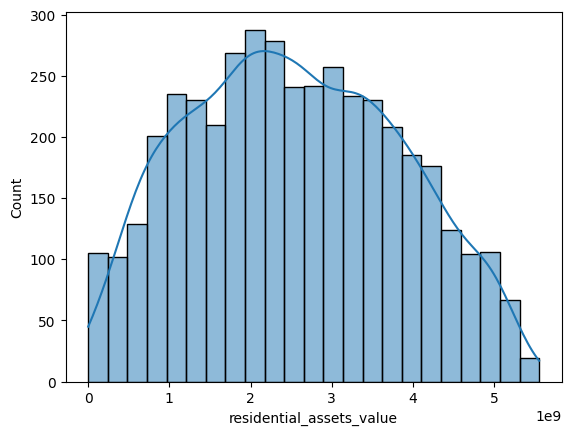

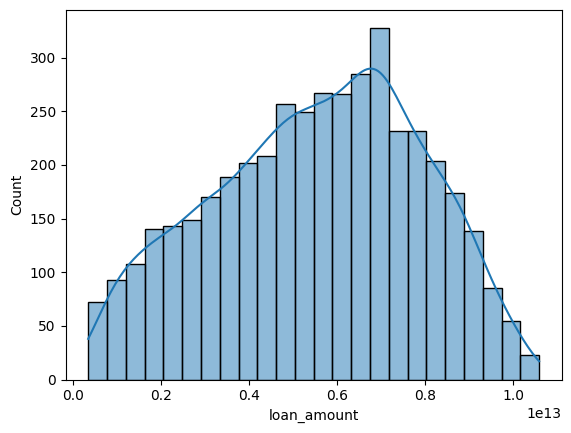

In [ ]:
X=0
for i in NUMERICAL_COLUMNS:
    sns.histplot(x=i,data=df,kde=True)
    print('\n')
    plt.show()

    #know our columns becomes normaly distributed 

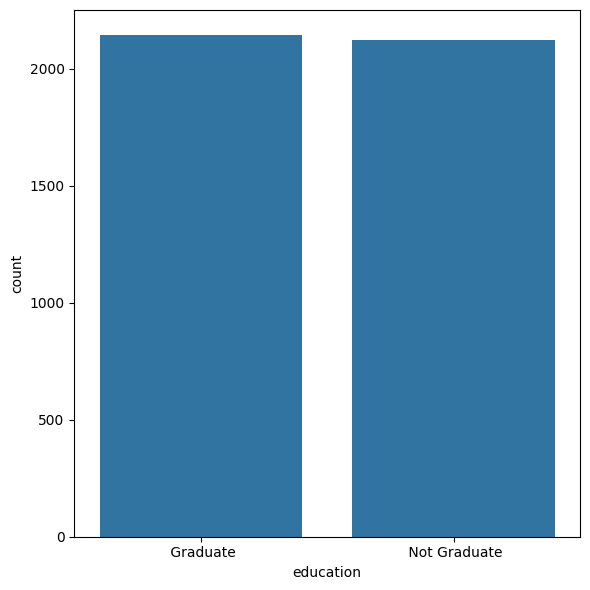

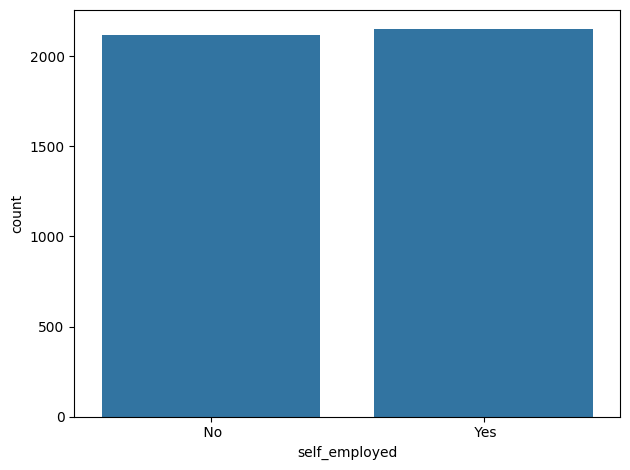

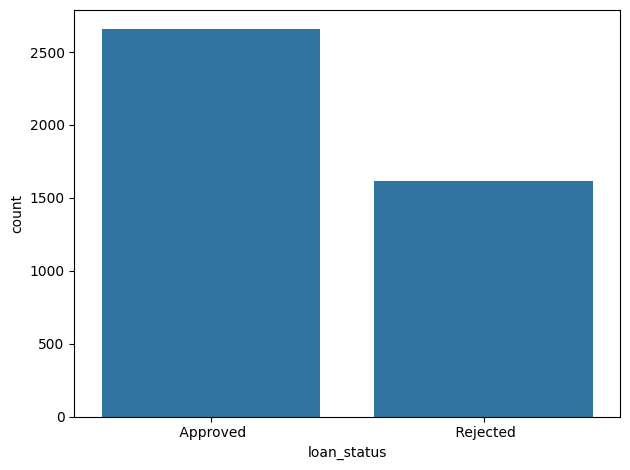

In [ ]:
#categorical columns
plt.figure(figsize=(6,6))
x=0
for i in categorical_columns:
    sns.countplot(data=df,x=i)
    print('\n')
    plt.tight_layout()
    plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_2912\737412393.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[NUMERICAL_COLUMNS[i]],shade=True, color='r')
C:\Users\ACER\AppData\Local\Temp\ipykernel_2912\737412393.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[NUMERICAL_COLUMNS[i]],shade=True, color='r')
C:\Users\ACER\AppData\Local\Temp\ipykernel_2912\737412393.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[NUMERICAL_COLUMNS[i]],shade=True, color='r')
C:\Users\ACER\AppData\Local\Temp\ipykernel_2912\737412393.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.


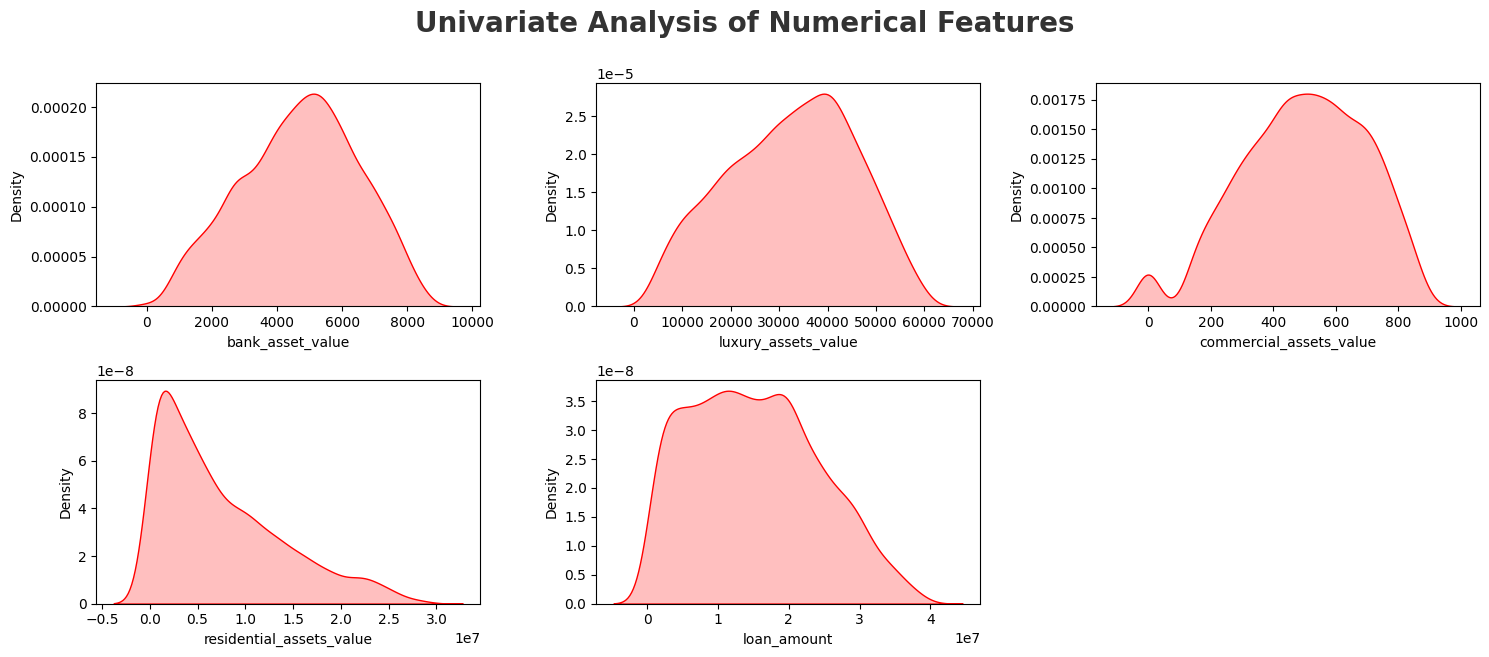

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(NUMERICAL_COLUMNS)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[NUMERICAL_COLUMNS[i]],shade=True, color='r')
    plt.xlabel(NUMERICAL_COLUMNS[i])
    plt.tight_layout()

<Axes: title={'center': 'loan Approval vs loan Rejected'}, ylabel='count'>

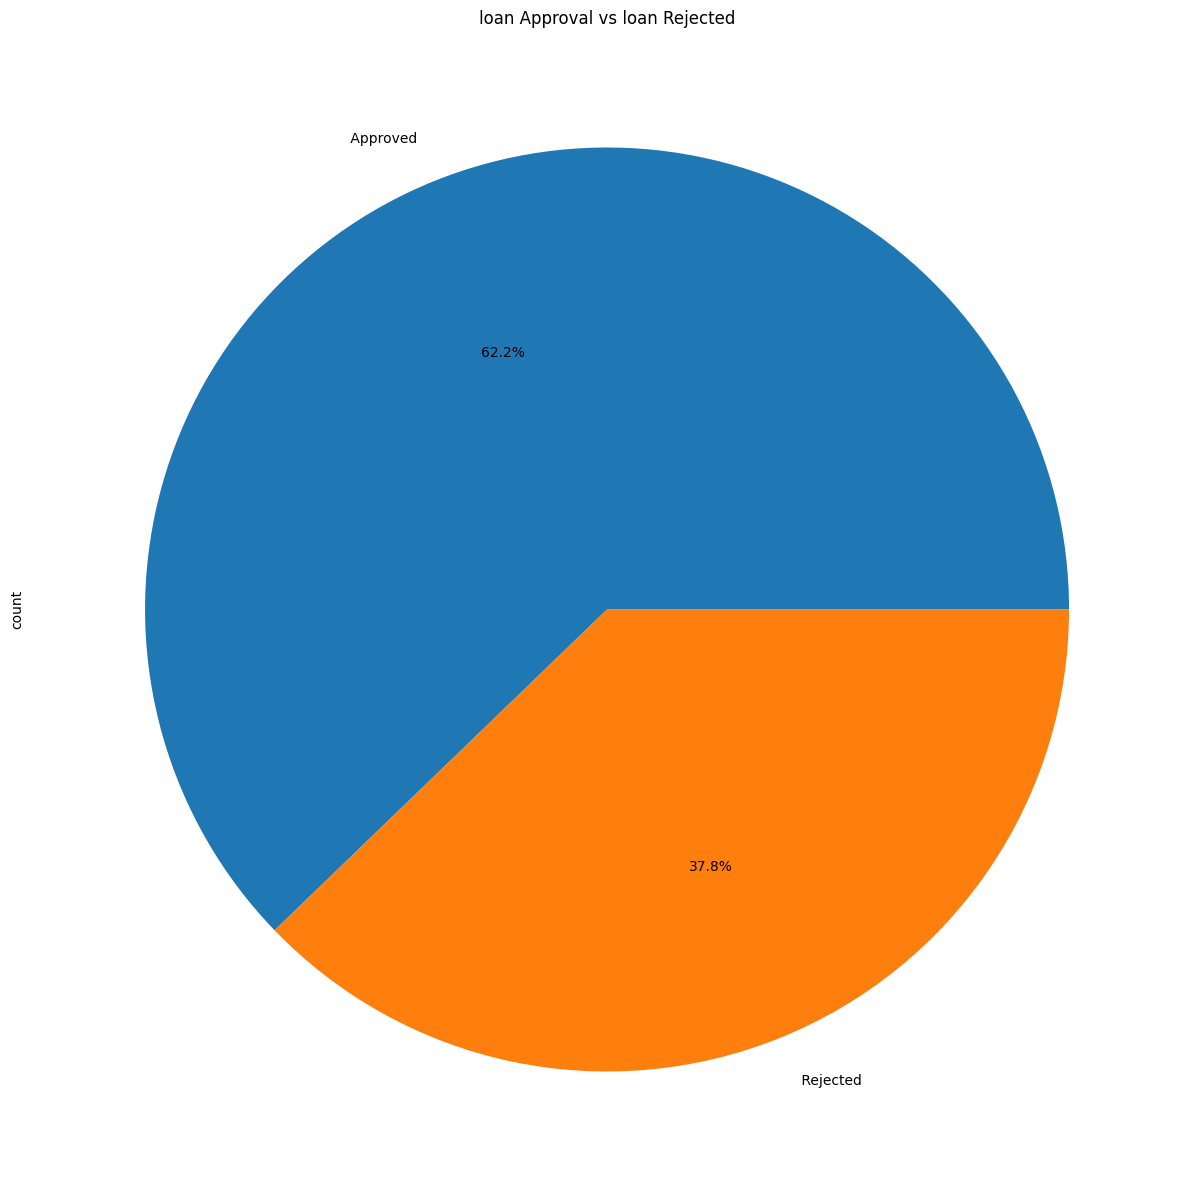

In [ ]:
plt.figure(figsize=[6,6])
plt.title('loan Approval vs loan Rejected')
plt
df["loan_status"].value_counts().plot.pie(y=df["loan_status"],figsize=(15,15),autopct='%1.1f%%')

In [ ]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

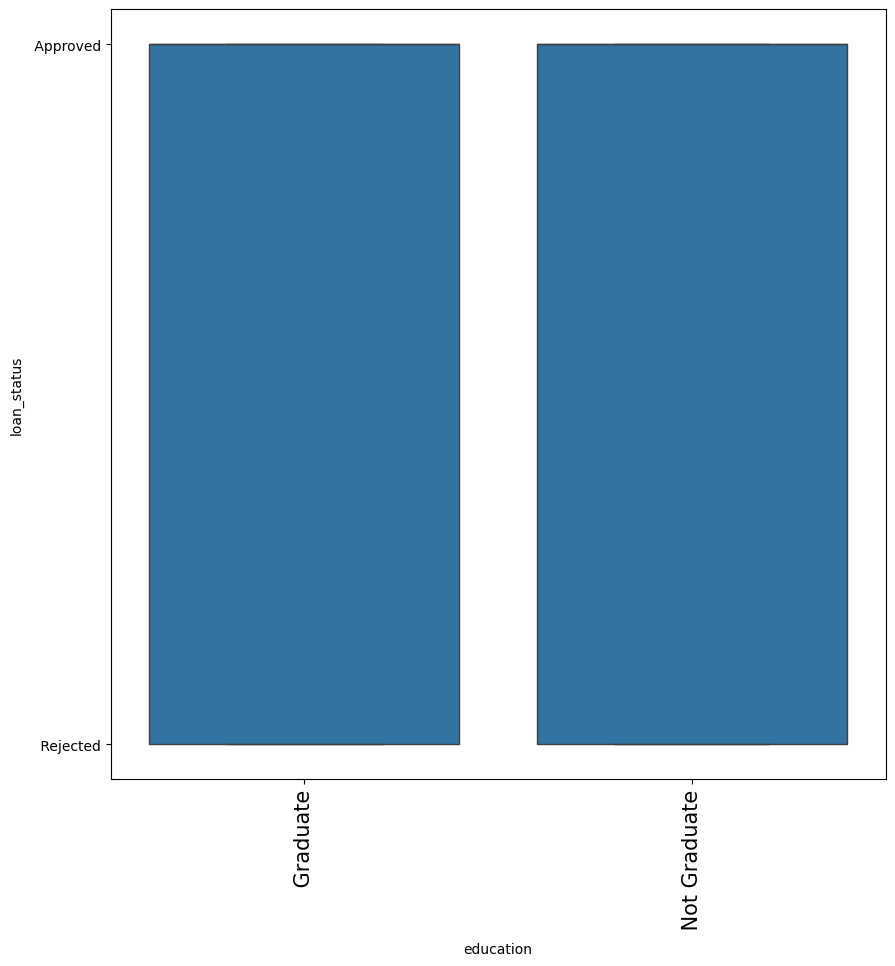

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="education",y="loan_status",data=df)
plt.xticks(size=15,rotation=90)
plt.show()

In [ ]:
df.to_csv('loan_approval.csv')